# Natural Language Processing

You will be attempting to classify Yelp Reviews (data: yelp.csv) into 1 star or 5 star categories based on the text content in the reviews. 

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
import warnings
warnings.filterwarnings("ignore")

## DATA

In [5]:
yelp = pd.read_csv('D:/DataScience_Intermediate/08-Natural-Language-Processing/yelp.csv')
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [6]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [7]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [8]:
# Add a new column called "text length" 
yelp['text length'] = yelp['text'].apply(len)

# Keep meaningful columns
yelp_df = yelp.drop(['business_id', 'date', 'review_id', 'type', 'user_id'], axis=1)
yelp_df.head()

,stars,text,cool,useful,funny,text length
0,5,My wife took me here on my birthday for breakf...,2,5,0,895
1,5,I have no idea why some people give bad review...,0,0,0,1349
2,4,love the gyro plate. Rice is so good and I als...,0,1,0,76
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0,423
4,5,General Manager Scott Petello is a good egg!!!...,0,0,0,471


# EDA

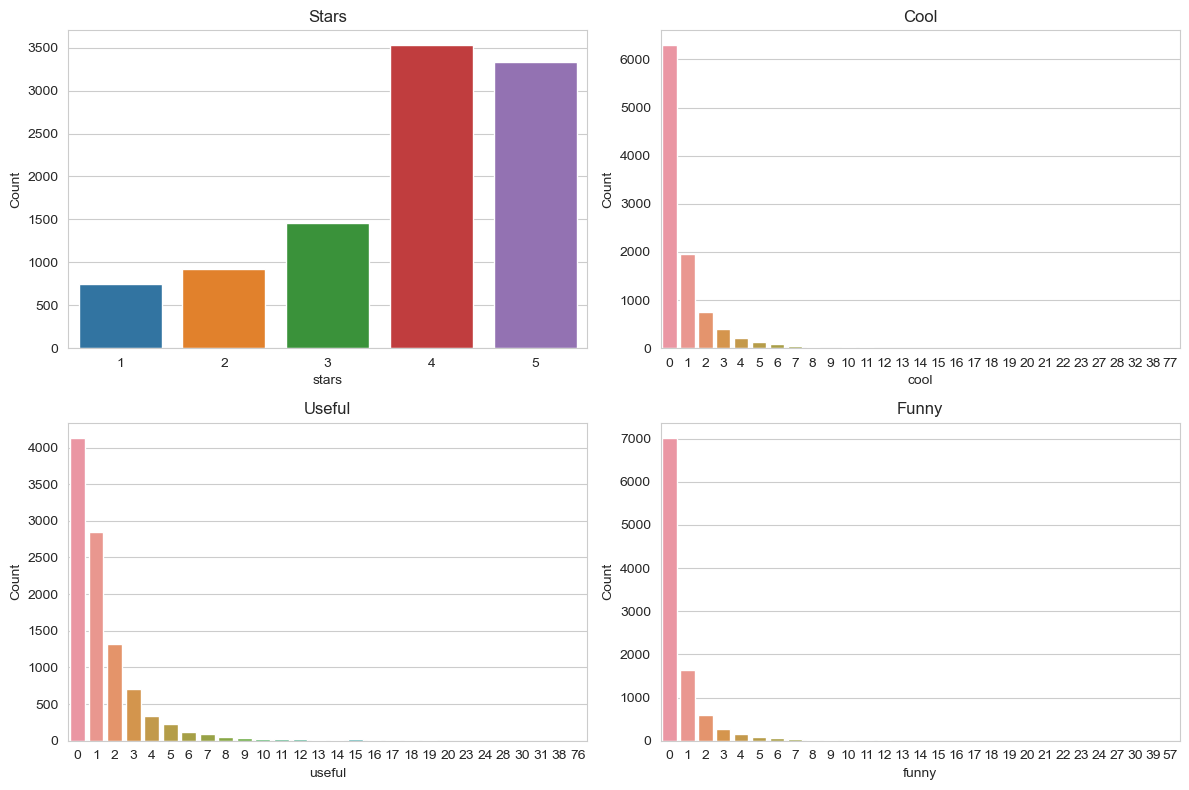

In [10]:
fig = plt.figure(figsize=(12,8))
axes1 = plt.subplot(2,2,1)
axes1 = sns.countplot(x='stars', data=yelp_df)
axes1.set_title('Stars')
axes1.set_ylabel('Count')

axes2 = plt.subplot(2,2,2)
axes2 = sns.countplot(x='cool', data=yelp_df)
axes2.set_title('Cool')
axes2.set_ylabel('Count')

axes3 = plt.subplot(2,2,3)
axes3 = sns.countplot(x='useful', data=yelp_df)
axes3.set_title('Useful')
axes3.set_ylabel('Count')

axes4 = plt.subplot(2,2,4)
axes4 = sns.countplot(x='funny', data=yelp_df)
axes4.set_title('Funny')
axes4.set_ylabel('Count')

plt.tight_layout()

Text(0.5, 1.0, 'Text Length Distribution')

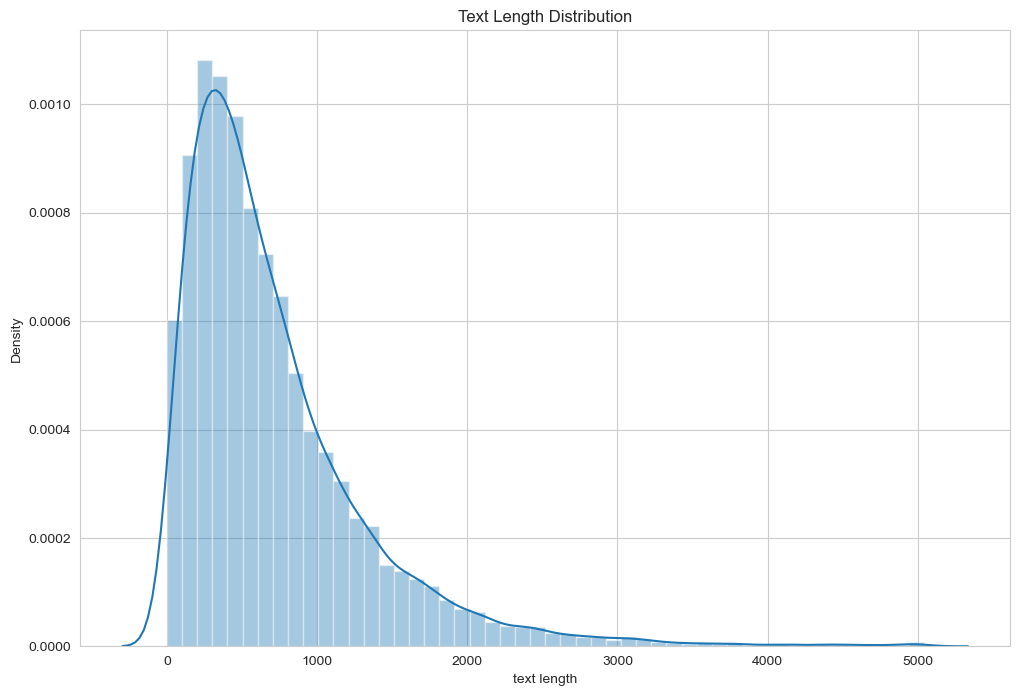

In [11]:
fig = plt.figure(figsize=(12,8))
sns.distplot(yelp_df['text length'], kde=True, bins=50)
plt.title('Text Length Distribution')

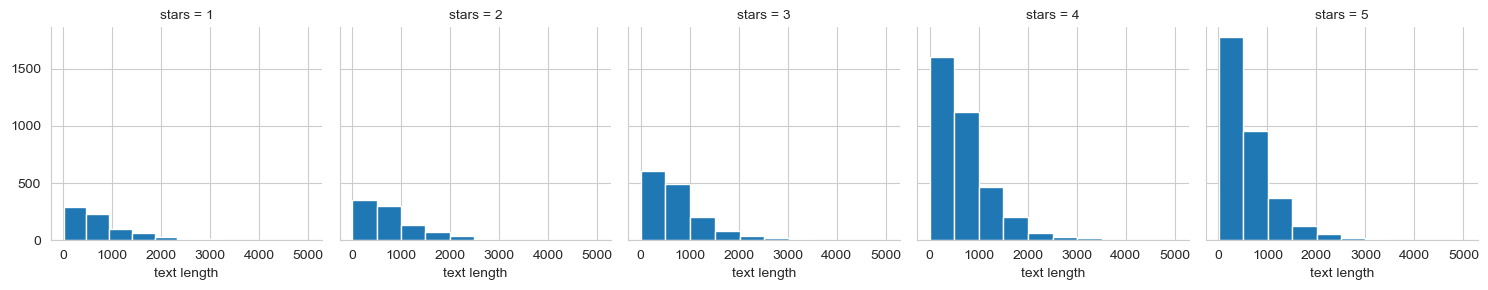

In [12]:
g = sns.FacetGrid(data = yelp, col = 'stars')
g = g.map(plt.hist,'text length')

<Axes: xlabel='stars', ylabel='text length'>

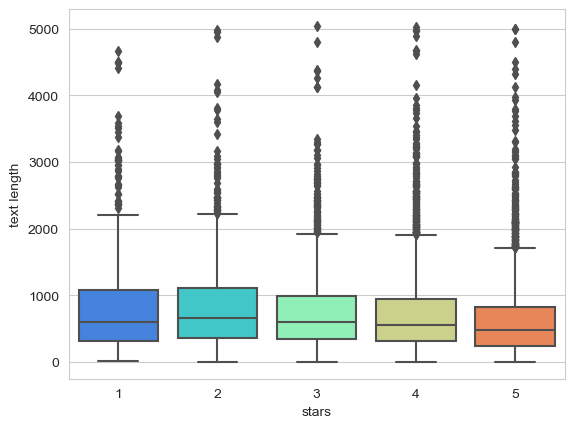

In [13]:
sns.boxplot(x='stars', y='text length', data=yelp_df, palette='rainbow')

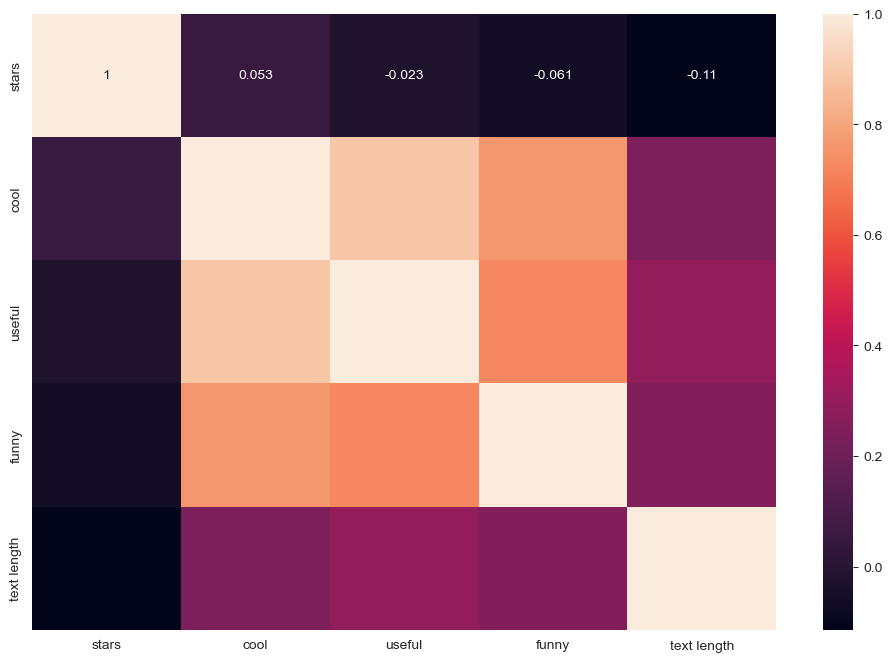

In [14]:
# Correlation between Label and Other Variables
yelp_cor = yelp_df[['stars', 'cool', 'useful', 'funny', 'text length']].corr()

fig = plt.figure(figsize=(12,8))
axes = sns.heatmap(yelp_cor, annot=True)

No correlation between stars and other other variables(the coefficients approximate zero)???!!!

# Text Pre-processing

In [17]:
import re
import string
from nltk.corpus import stopwords
import nltk

nltk.download("stopwords")

def text_process(text):
    # Convert to lowercase
    text = text.lower()
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove punctuation
    text = ''.join(char for char in text if char not in string.punctuation)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    return ' '.join(word for word in text.split() if word not in stop_words)

# Filter dataset to include only 1-star and 5-star reviews
yelp_filtered = yelp[(yelp['stars'] == 1) | (yelp['stars'] == 5)] 
print(yelp_filtered['stars'].value_counts())

# Apply preprocessing to the reviews
yelp_filtered['processed_text'] = yelp_filtered['text'].apply(text_process)

# Labeling
X = yelp_filtered['processed_text']
y = yelp_filtered['stars']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nguyen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


stars
5    3337
1     749
Name: count, dtype: int64


In [18]:
yelp_filtered.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length,processed_text
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,895,wife took birthday breakfast excellent weather...
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1349,idea people give bad reviews place goes show p...
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,423,rosie dakota love chaparral dog park convenien...
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,471,general manager scott petello good egg go deta...
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1571,drop youre drive ate go back next day food goo...


## NLP

### Training and evaluate model

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

In [22]:
# CountVectorizer
X_vectorized = CountVectorizer().fit_transform(X)

# Model
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.3, random_state=101)
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Predictions and evaluations
y_pred = nb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[166  62]
 [ 26 972]]
              precision    recall  f1-score   support

           1       0.86      0.73      0.79       228
           5       0.94      0.97      0.96       998

    accuracy                           0.93      1226
   macro avg       0.90      0.85      0.87      1226
weighted avg       0.93      0.93      0.93      1226



#### -> Creating a Data Pipeline

In [24]:
# Pipeline
mypipline = Pipeline([('bow', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('classifier', MultinomialNB())])

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)
mypipline.fit(X_train, y_train)

# Predictions and Evaluation
y_predict = mypipline.predict(X_test)
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[  0 228]
 [  0 998]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



Tf-Idf made things worse!? How could we tune this model?

## SVM

In [27]:
from sklearn.svm import SVC
from sklearn.datasets import fetch_20newsgroups

# Labeling
X = yelp_filtered['processed_text']
y = yelp_filtered['stars']
X_features = TfidfVectorizer().fit_transform(X)

# TF-IDF Vectorizer
X_features = TfidfVectorizer().fit_transform(X)

# SVM modeling
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)
svc = SVC(kernel='linear')  
svc.fit(X_train, y_train)

# Predict and evaluate
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['5-star', '1-star']))

              precision    recall  f1-score   support

      5-star       0.89      0.64      0.75       167
      1-star       0.91      0.98      0.95       651

    accuracy                           0.91       818
   macro avg       0.90      0.81      0.85       818
weighted avg       0.91      0.91      0.91       818



# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

# Labeling
X = yelp_filtered['processed_text']
y = yelp_filtered['stars']
X_features = TfidfVectorizer().fit_transform(X)

# Logistic Regression model
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)
logreg = LogisticRegression(max_iter=1000) 
logreg.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['5-star', '1-star']))

              precision    recall  f1-score   support

      5-star       1.00      0.26      0.41       167
      1-star       0.84      1.00      0.91       651

    accuracy                           0.85       818
   macro avg       0.92      0.63      0.66       818
weighted avg       0.87      0.85      0.81       818



Seems like LR show less accuracy then the other two models?

### -> Tuning Logistic Regression

In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Grid Search 
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],  # Optimization algorithm
}
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Predict and evaluate the model
best_logreg = grid_search.best_estimator_
y_pred = best_logreg.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['5-star', '1-star']))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters found:  {'C': 100, 'solver': 'newton-cg'}
Best score:  0.9332874383578964
              precision    recall  f1-score   support

      5-star       0.89      0.63      0.74       167
      1-star       0.91      0.98      0.94       651

    accuracy                           0.91       818
   macro avg       0.90      0.80      0.84       818
weighted avg       0.91      0.91      0.90       818

